In [1]:
import numpy as np
import forward.common as common
import forward.homogeneous_semi_inf as hsi
import inverse.fit_homogeneous_semi_inf as fhsi
import matplotlib.pyplot as plt

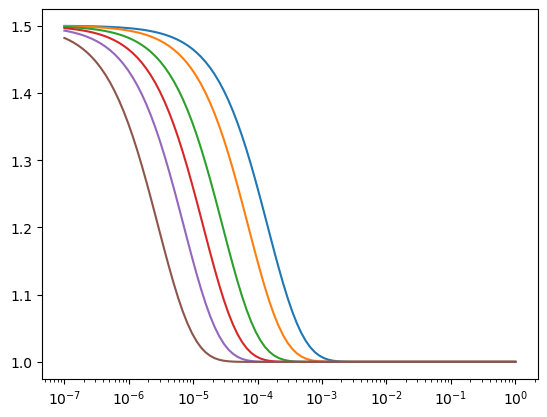

In [21]:
tau = np.logspace(-7, 0, 100)
lambda0 = 785
mua = 0.01
musp = 10
rho = 2
n = 1.4
db = [1e-9, 2e-9, 5e-9, 1e-8, 2e-8, 5e-8]
v_ms = [1e-5, 2e-5, 5e-5, 1e-4, 2e-4, 5e-4]
beta = 0.5
g1_norm = np.zeros((len(tau), len(db)))
g2_norm = np.zeros((len(tau), len(db)))
for i in range(len(db)):
    msd = common.msd_brownian(tau, db[i])
    g1_norm[:, i] = hsi.g1_norm(msd, mua, musp, rho, n, lambda0)

g2_norm = 1 + beta * g1_norm**2
plt.semilogx(tau, g2_norm)
plt.show()

In [22]:
beta_calculator =  fhsi.BetaCalculator(mode="raw", tau_lims=(1e-7, 2e-7))
#msd_model = fhsi.MSDModel(model_name="brownian", param_init={"db": 1e-8}, param_bounds={"db": (1e-10, 1)})
#msd_model = fhsi.MSDModel(model_name="ballistic", param_init={"v_ms": 1e-4}, param_bounds={"v_ms": (1e-7, 1)})
msd_model = fhsi.MSDModel(model_name="hybrid", param_init={"db": 1e-8, "v_ms": 1e-4}, param_bounds={"db": (1e-10, 1), "v_ms": (1e-7, 1)})
fitter = fhsi.FitHomogeneousSemiInf(
    tau,
    g2_norm,
    mua,
    musp,
    rho,
    n,
    lambda0,
    msd_model,
    beta_calculator,
)

params = fitter.fit()
print(params)

{'db': array([9.92314233e-10, 1.80639448e-09, 4.94515363e-09, 9.78112841e-09,
       1.91254360e-08, 4.46630282e-08]), 'v_ms': array([1.00000000e-07, 1.03301325e-05, 1.57524164e-06, 1.27327590e-05,
       1.04900235e-04, 1.67748076e-03])}
